# Sentiment Analysis in Python
In this notebook we will be doing some sentiment analysis in python using two different techniques:

1. Vader (Valence Aware Dictionary and Sentiment Reasoner) - Bag of Words Approach.
2. Roberta Pretrained Model From
3. Huggingface Pipeline

# Step 0. Read in Data and NLTK Basic



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
# Read in data
df = pd.read_excel('Amazon_Reviews_500rows.xlsx')
# df = pd.read_csv('Amazon_Reviews.csv',sep = ',')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df['Summary'].values[500]

'Excellent chip!'

In [ ]:
print(df.shape)

(5222, 10)


In [ ]:
df = df.head(5200)
print(df.shape)
df

(5200, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
5195,5198,B003R0LKSG,ALXASFO2K9U8R,A. Fullard,0.0,0.0,5.0,1.317773e+09,"This DOES have whole peas in it, but it is a g...",Cats do occasionally need a little green in th...
5196,5199,B003R0LKSG,A9E72VK0VM925,Tami,0.0,0.0,5.0,1.311206e+09,Excellent Grain-Free Option,We recently adopted a new kitten. We rotate Fe...
5197,5200,B003R0LKSG,A3PDWI55HS4YH3,Kari Skinner,0.0,0.0,5.0,1.303085e+09,Super soft and healthy cat!,I adopted my adorable Edmund last year from a ...
5198,5201,B003R0LKSG,AS0A4EHP1XRT8,sister46,3.0,5.0,1.0,1.304640e+09,Poor value for the money,"The consistency of the grain free chicken, tur..."


# Quick EDA

In [ ]:
df['Score']

0       5.0
1       1.0
2       4.0
3       2.0
4       5.0
       ... 
5195    5.0
5196    5.0
5197    5.0
5198    1.0
5199    2.0
Name: Score, Length: 5200, dtype: float64

<Axes: title={'center': 'Count of Reviews by Stars'}>

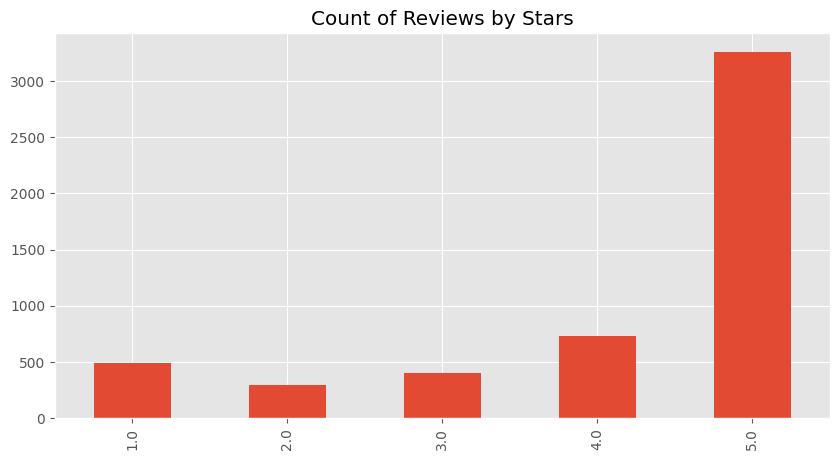

In [ ]:
df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars',
                                             figsize = (10,5))

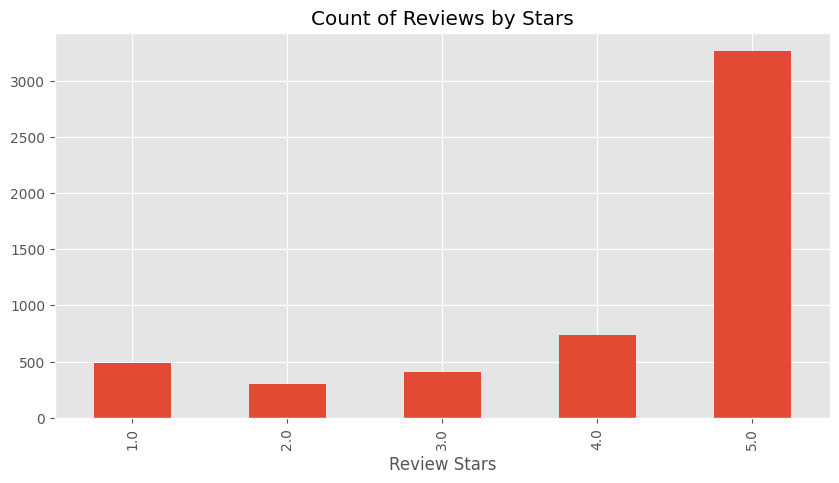

In [ ]:
ax = df['Score'].value_counts().sort_index() \
.plot(kind = 'bar',
      title = 'Count of Reviews by Stars',
      figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [ ]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1: VADER Sentiment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.


*   This uses a "bag of words" approach
    1.   Stop words are removed
    2.   Each word is scored and combined to a total score




In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download stopwords for Indonesian
nltk.download('stopwords')

# Define a sentiment dictionary for Indonesian
sentiment_dict = {
    'positif': ['baik', 'bagus', 'senang'],
    'negatif': ['buruk', 'jelek', 'sedih']
}

# Preprocess the text
text = "Produk ini sangat bagus dan memuaskan pelanggan."
tokens = word_tokenize(text.lower())

# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('indonesian'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Analyze sentiment
sentiment_score = 0
for token in filtered_tokens:
    if token in sentiment_dict['positif']:
        sentiment_score += 1
    elif token in sentiment_dict['negatif']:
        sentiment_score -= 1

# Determine sentiment label
sentiment_label = 'Positif' if sentiment_score > 0 else 'Negatif' if sentiment_score < 0 else 'Netral'

# Output
print("Teks Asli:", text)
print("Label Sentimen:", sentiment_label)


Teks Asli: Produk ini sangat bagus dan memuaskan pelanggan.
Label Sentimen: Positif


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run the polarity score on the entire dataset
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
5195,5198,B003R0LKSG,ALXASFO2K9U8R,A. Fullard,0.0,0.0,5.0,1.317773e+09,"This DOES have whole peas in it, but it is a g...",Cats do occasionally need a little green in th...
5196,5199,B003R0LKSG,A9E72VK0VM925,Tami,0.0,0.0,5.0,1.311206e+09,Excellent Grain-Free Option,We recently adopted a new kitten. We rotate Fe...
5197,5200,B003R0LKSG,A3PDWI55HS4YH3,Kari Skinner,0.0,0.0,5.0,1.303085e+09,Super soft and healthy cat!,I adopted my adorable Edmund last year from a ...
5198,5201,B003R0LKSG,AS0A4EHP1XRT8,sister46,3.0,5.0,1.0,1.304640e+09,Poor value for the money,"The consistency of the grain free chicken, tur..."


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = str(row['Text'])
  myid = row ['Id']
  res[myid] = sia.polarity_scores(text)
res

  0%|          | 0/5200 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0310,0.1090,0.0200,0.0430,0.0600,0.015,0.0160,0.0610,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7470,0.8110,0.7140,0.8640,0.8480,0.8180,0.774,0.8170,0.8720,0.6520
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2530,0.1580,0.1770,0.1160,0.1090,0.1220,0.210,0.1660,0.0670,0.3480
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.8316,0.9618,0.9041,0.9133,0.8647,0.8671,0.969,0.9954,0.1255,0.7501


In [ ]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
5198,0.060,0.818,0.122,0.8671
5199,0.015,0.774,0.210,0.9690
5200,0.016,0.817,0.166,0.9954
5201,0.061,0.872,0.067,0.1255


In [ ]:
vaders = vaders.reset_index().rename(columns = {'index' : 'Id'})
vaders = vaders.merge(df, how = 'left')

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5198,0.060,0.818,0.122,0.8671,B003R0LKSG,ALXASFO2K9U8R,A. Fullard,0.0,0.0,5.0,1.317773e+09,"This DOES have whole peas in it, but it is a g...",Cats do occasionally need a little green in th...
5196,5199,0.015,0.774,0.210,0.9690,B003R0LKSG,A9E72VK0VM925,Tami,0.0,0.0,5.0,1.311206e+09,Excellent Grain-Free Option,We recently adopted a new kitten. We rotate Fe...
5197,5200,0.016,0.817,0.166,0.9954,B003R0LKSG,A3PDWI55HS4YH3,Kari Skinner,0.0,0.0,5.0,1.303085e+09,Super soft and healthy cat!,I adopted my adorable Edmund last year from a ...
5198,5201,0.061,0.872,0.067,0.1255,B003R0LKSG,AS0A4EHP1XRT8,sister46,3.0,5.0,1.0,1.304640e+09,Poor value for the money,"The consistency of the grain free chicken, tur..."


In [ ]:
vaders.head(0)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [ ]:
df.head(0)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


# Plot VADER results

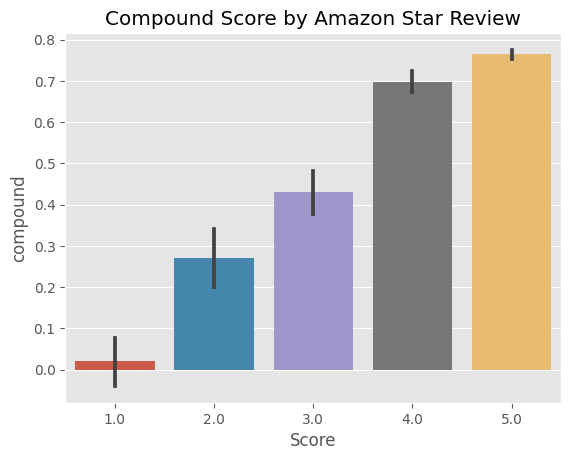

In [ ]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

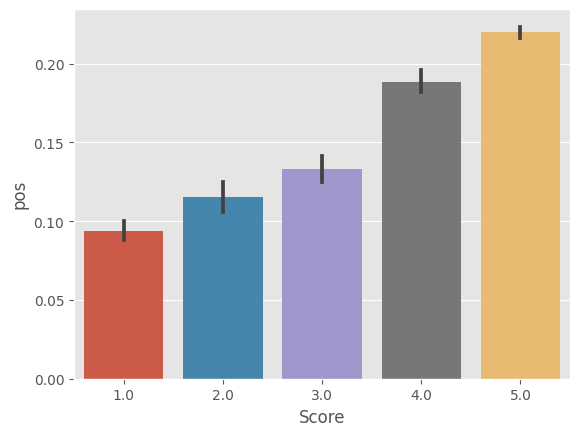

In [ ]:
sns.barplot(data = vaders, x = 'Score', y = 'pos')

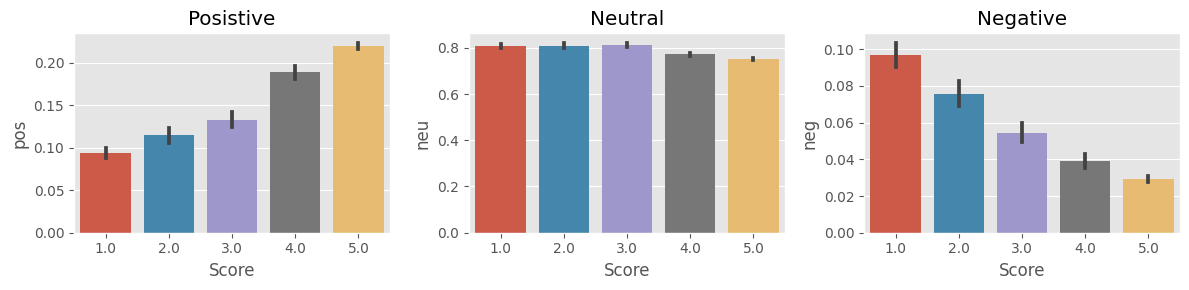

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (12, 3))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Posistive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model


*   Use a model trained of a large corpus of data.
*   Transformer model accounts for the worlds but also the context related to the other words



In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER Results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = output[0][0].detach().numpy()
scores

array([ 3.143629  , -0.71066874, -2.6558962 ], dtype=float32)

In [ ]:
scores = softmax(scores)
scores   # ([negative neutral positive])

array([0.97635514, 0.02068748, 0.00295737], dtype=float32)

In [ ]:
scores_dict = {
    'roberta-neg' : scores[0],
    'roberta-neu' : scores[1],
    'roberta-pos' : scores[2]
}
print(scores_dict)

{'roberta-neg': 0.97635514, 'roberta-neu': 0.020687476, 'roberta-pos': 0.002957372}


# Step 3. Combine and Compare

In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta-neg' : scores[0],
    'roberta-neu' : scores[1],
    'roberta-pos' : scores[2]
  }
  return(scores_dict)

In [ ]:
both = {**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta-neg': 0.009624243,
 'roberta-neu': 0.049980447,
 'roberta-pos': 0.9403953}

In [ ]:
from multiprocessing import Value
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = str(row['Text'])
    myid = row ['Id']
    vader_result = sia.polarity_scores(text)
    #RENAME
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')
  # break

  0%|          | 0/5200 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 540
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1498
Broke for id 1826
Broke for id 2248
Broke for id 2476
Broke for id 2584
Broke for id 2610
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4408
Broke for id 5040
Broke for id 5192


In [ ]:
print(df['Text'].values[82])

I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream, it made the coffee too rich. Also, 

In [ ]:
results_df = pd.DataFrame(res).T
results_dff = results_df.reset_index().rename(columns = {'index':'Id'})
results_dfff = results_dff.merge(df, how = 'left')

In [ ]:
results_dfff.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta-neg,roberta-neu,roberta-pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


# Compare Scores Between Models

In [ ]:
results_dfff.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta-neg', 'roberta-neu', 'roberta-pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step.3 Combine and Compare

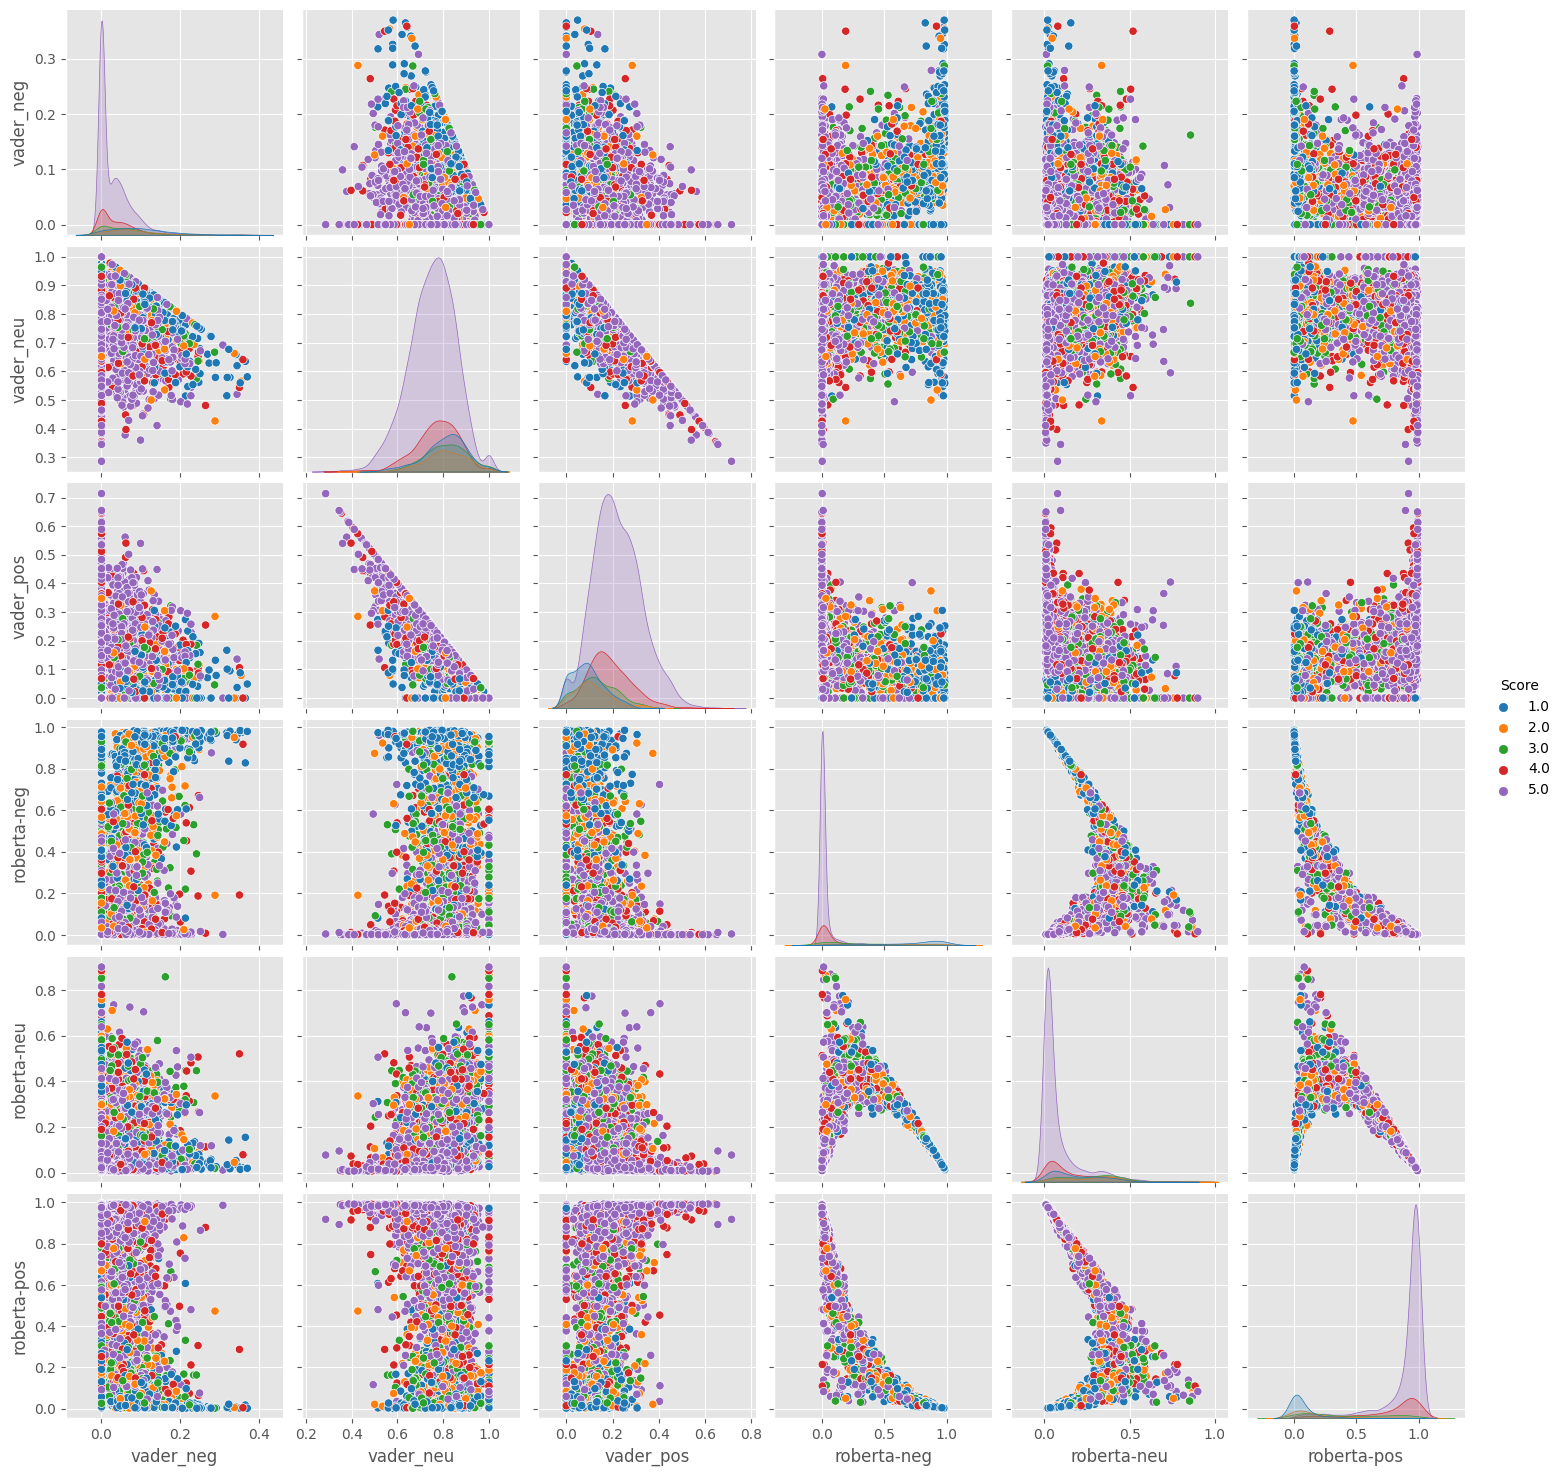

In [ ]:
sns.pairplot(data = results_dfff,
             vars =['vader_neg', 'vader_neu', 'vader_pos',
             'roberta-neg', 'roberta-neu', 'roberta-pos'],
             hue = 'Score', palette = 'tab10')
plt.show()

# Step 4: Review Examples:


*   Positive 1-Star and Negative 5-Star Reviews
Let's lokk at some examples where the models scoring and review score differ the most.

In [ ]:
results_dfff.query('Score == 1').sort_values('roberta-pos', ascending = False)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta-neg,roberta-neu,roberta-pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
4352,4381,0.000,0.799,0.201,0.7003,0.001952,0.014829,0.983219,B004391DK0,AOYBPBZLGSDOK,gram,0.0,0.0,1.0,1.350605e+09,gram,Bisquick GF is easy to use. Pancakes and muffi...
4843,4873,0.000,1.000,0.000,0.0000,0.001876,0.026457,0.971667,B001TY6T6K,A3UPXR0I04EO4W,LuvLeaf,4.0,5.0,1.0,1.272067e+09,The other reviewer is totally right!!!,You can get these SOOOOOOOOOOOOO much cheaper ...
4250,4279,0.000,0.638,0.362,0.8118,0.001776,0.038270,0.959954,B004391DK0,AA5HS6LQ8XC6G,"Fantasticalice Alice ""Phat G-ma""",25.0,39.0,1.0,1.287360e+09,"Sugar,sugar,sugar",Second ingredient is SUGAR! Need I say more? M...
2071,2083,0.000,0.735,0.265,0.8803,0.005765,0.034417,0.959818,B005HGAVGK,A1TPGWR8AZTT9,J. Lewis,2.0,2.0,1.0,1.336608e+09,Not what I ordered.,I got two Teas and one type of iced coffe and ...
2952,2973,0.000,0.932,0.068,0.4939,0.003774,0.039319,0.956907,B0071H5VTU,AJ2CERNLWGFVD,Michael J. Cashen,3.0,8.0,1.0,1.341706e+09,"1 star for price, 5 stars for taste","My local Walmart and Target both have this, gr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,3535,0.189,0.559,0.252,0.4458,0.984105,0.013546,0.002349,B000YPKODY,A2005BAEUTSAJE,slidehollowmisress,1.0,1.0,1.0,1.340237e+09,cracker jack,Arrives $15.06 postage due in a used Friendly ...
3431,3456,0.063,0.838,0.099,0.2937,0.971716,0.026000,0.002284,B005K4Q1VI,A2BZN96W6QP6XH,mathew lothian,0.0,2.0,1.0,1.323821e+09,not quality at all,this product taste stale and is full of artifi...
3985,4011,0.082,0.849,0.068,-0.1275,0.980969,0.016769,0.002262,B00110FN28,A3L51TJ5BFKJ59,"M. ""Gorehound""",5.0,19.0,1.0,1.192320e+09,Do not eat these cookies in bed!,Overall I was not happy with the crumbiness of...
255,258,0.105,0.816,0.079,-0.3489,0.978985,0.018780,0.002235,B00821UN4M,A332AAPB4P75L4,Heather Crimson,2.0,2.0,1.0,1.348099e+09,Reeks like chemicals,I so wish I would have read this review before...


In [ ]:
results_dfff.query('Score == 1')\
.sort_values('roberta-pos', ascending = False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [ ]:
results_dfff.query('Score == 1')\
.sort_values('vader_pos', ascending = False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [ ]:
# Negative Sentiment 5-Star View - Roberta Model
results_dfff.query('Score == 5')\
.sort_values('roberta-neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
# Negative Sentiment 5-Star View - Vader Model
results_dfff.query('Score == 5')\
.sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Extra: The Transformers Pipeline


*   Quick & Easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

In [ ]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [ ]:
sent_pipeline('Hahahaha, you look so ugly!! BOoo')

[{'label': 'NEGATIVE', 'score': 0.999763548374176}]

# THE END - LINKIN PARK